In [1]:
import pandas as pd


df = pd.read_csv('eda_inventory_dataset_batch1.csv')  

print("First 10 rows of the dataset:")
print(df.head(10))

print("\nDataset columns and their data types:")
print(df.dtypes)

summary_statistics = df.describe()
print("\nSummary statistics for numeric columns:")
print(summary_statistics)


missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_info = missing_percentage[missing_percentage > 0]
print("\nColumns with missing values and their percentages:")
print(missing_info)

First 10 rows of the dataset:
  Product_ID Product_Name     Category    Supplier  Purchase_Price  \
0      P0001       Doodad     Clothing  Supplier D          339.75   
1      P0002    Doohickey     Clothing  Supplier C             NaN   
2      P0003  Thingamajig     Clothing  Supplier B             NaN   
3      P0004    Doohickey     Clothing  Supplier A             NaN   
4      P0005    Doohickey         Toys  Supplier E          228.75   
5      P0006       Gadget         Toys  Supplier E          401.21   
6      P0007  Thingamajig    Furniture  Supplier A          412.99   
7      P0008  Thingamajig  Electronics  Supplier A          430.21   
8      P0009  Thingamajig     Clothing  Supplier B             NaN   
9      P0010    Doohickey    Furniture  Supplier C          221.18   

   Sale_Price  Quantity_In_Stock  Reorder_Level  Units_On_Order  Discontinued  
0         NaN              588.0          292.0           161.0             1  
1      470.14              348.0       

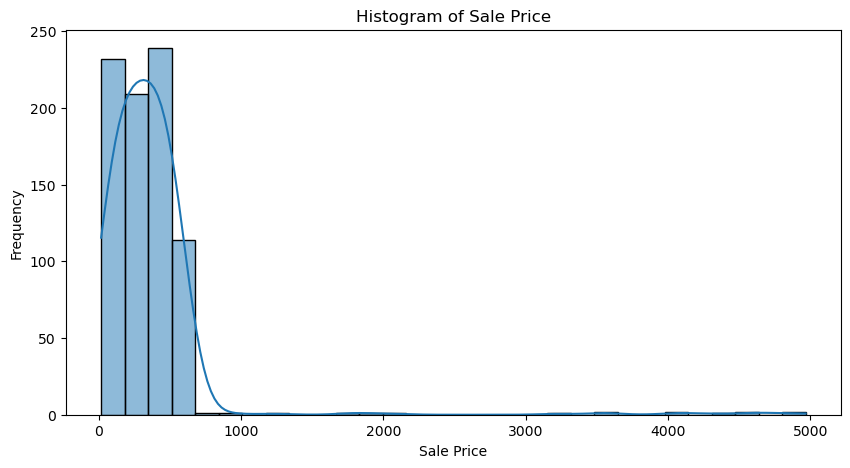

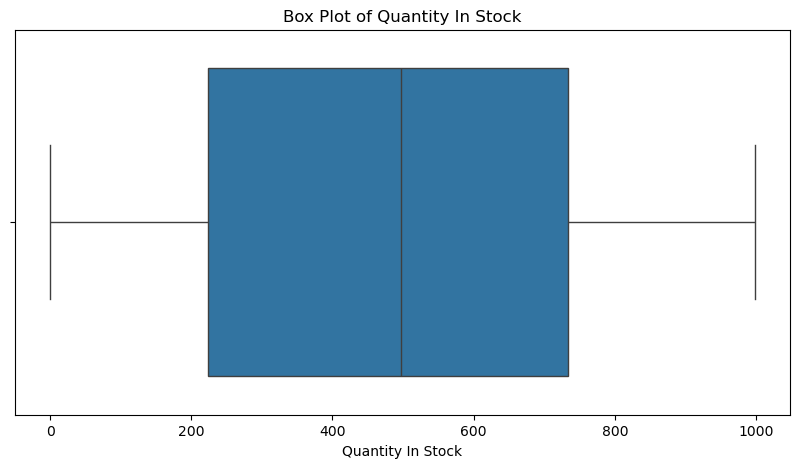

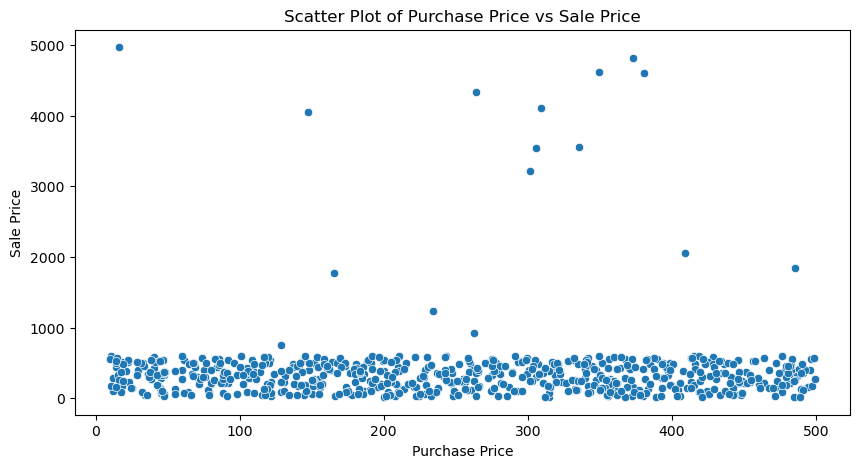

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
sns.histplot(df['Sale_Price'], bins=30, kde=True)
plt.title('Histogram of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Quantity_In_Stock'])
plt.title('Box Plot of Quantity In Stock')
plt.xlabel('Quantity In Stock')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Purchase_Price', y='Sale_Price', data=df)
plt.title('Scatter Plot of Purchase Price vs Sale Price')
plt.xlabel('Purchase Price')
plt.ylabel('Sale Price')
plt.show()



C:\Users\91733\AppData\Local\Temp\ipykernel_12360\3414565967.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchase_Price'].fillna(df['Purchase_Price'].median(), inplace=True)
C:\Users\91733\AppData\Local\Temp\ipykernel_12360\3414565967.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Summary Statistics Before Removing Outliers:
 count    1000.000000
mean      351.716760
std       428.528007
min        15.020000
25%       196.950000
50%       313.475000
75%       419.195000
max      4967.800000
Name: Sale_Price, dtype: float64

Summary Statistics After Removing Outliers:
 count    984.000000
mean     306.164289
std      152.726564
min       15.020000
25%      193.500000
50%      313.475000
75%      410.512500
max      599.740000
Name: Sale_Price, dtype: float64


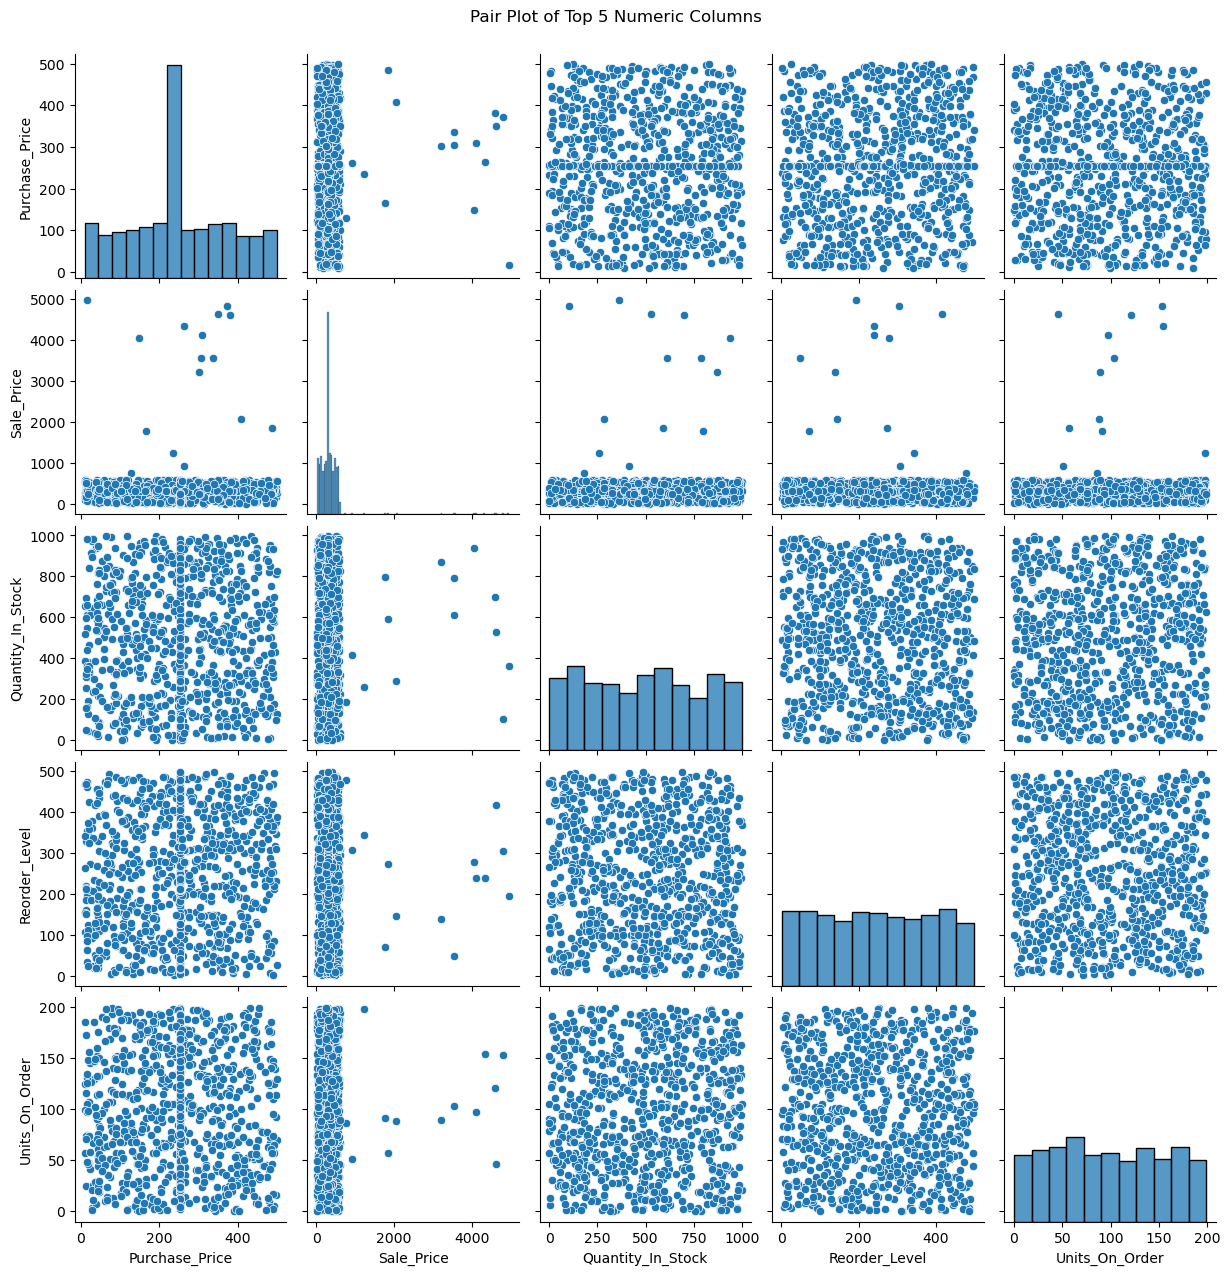

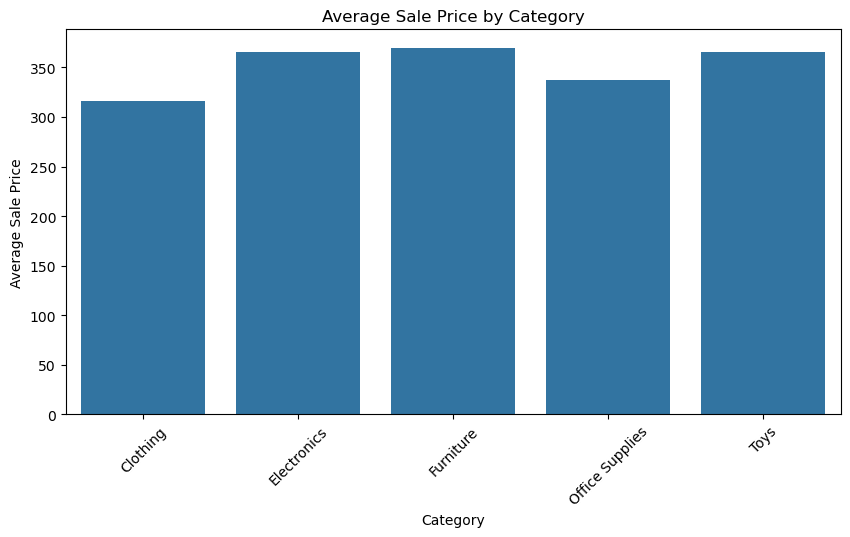

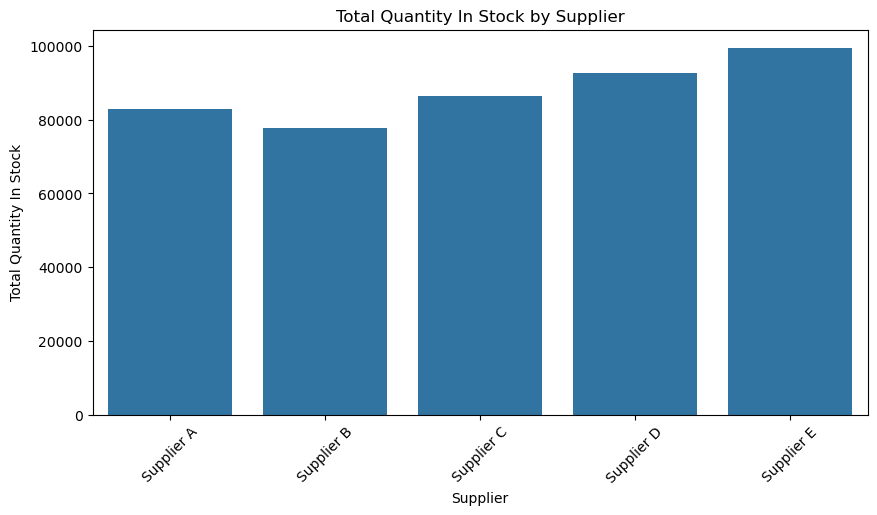

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('eda_inventory_dataset_batch1.csv')


df['Purchase_Price'].fillna(df['Purchase_Price'].median(), inplace=True)
df['Sale_Price'].fillna(df['Sale_Price'].median(), inplace=True)

Q1 = df['Sale_Price'].quantile(0.25)
Q3 = df['Sale_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

summary_before = df['Sale_Price'].describe()

df_no_outliers = df[(df['Sale_Price'] >= lower_bound) & (df['Sale_Price'] <= upper_bound)]

summary_after = df_no_outliers['Sale_Price'].describe()

print("Summary Statistics Before Removing Outliers:\n", summary_before)
print("\nSummary Statistics After Removing Outliers:\n", summary_after)

top_5_numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:5]
sns.pairplot(df[top_5_numeric_columns])
plt.suptitle('Pair Plot of Top 5 Numeric Columns', y=1.02)
plt.show()

avg_sale_price_by_category = df.groupby('Category')['Sale_Price'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Sale_Price', data=avg_sale_price_by_category)
plt.title('Average Sale Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()


quantity_by_supplier = df.groupby('Supplier')['Quantity_In_Stock'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Supplier', y='Quantity_In_Stock', data=quantity_by_supplier)
plt.title('Total Quantity In Stock by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Total Quantity In Stock')
plt.xticks(rotation=45)
plt.show()